In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from gameworlds.hex_world import HexState, HexAction
from actor_net import ActorNet
import numpy as np
from config import Config
import time

In [8]:
def get_action():
    action = input("Please enter position on the format XY, where X=row and Y=col: ")

    row = int(action[0])
    col = int(action[1])

    return HexAction(row, col)

In [9]:
def play_game(player1=None, player2=None, starting_player=1, argmax=False):
    state = HexState.empty_board(starting_player=starting_player)
    
    while not state.is_final_state:
        state.plot(labels=True)
        if state.player == 1:
            if player1 is None:
                move = get_action()
            else:
                move = player1.select_action(state, greedy=True, argmax=argmax)

              
        else:
            if player2 is None:
                move = get_action()
            else:
                move = player2.select_action(state, greedy=True, argmax=argmax)

        state = state.do_action(move)
        
        time.sleep(0.2)
        # clear_output(wait=True)
    state.plot(labels=True)
    print(f"Player {-state.player} won!")

In [40]:
# anet99 = ActorNet()
# anet99.load_params(99, suffix="3x3")

hex18 = ActorNet(benchmark=True)

# anet4 = ActorNet()
# anet4.load_params(4, suffix="5x5")

# 
# anet300 = ActorNet()
# anet300.load_params(300)

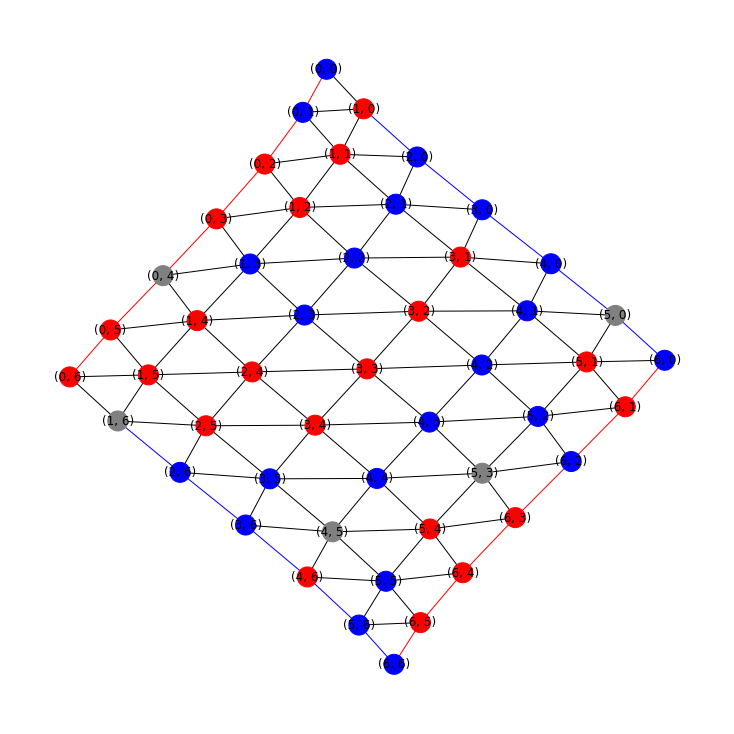

Player -1 won!


In [43]:
play_game(player1=hex18, player2=hex18, starting_player=1, argmax=False)

In [25]:

for i in range(100000):
    s.do_action(HexAction(1,3))

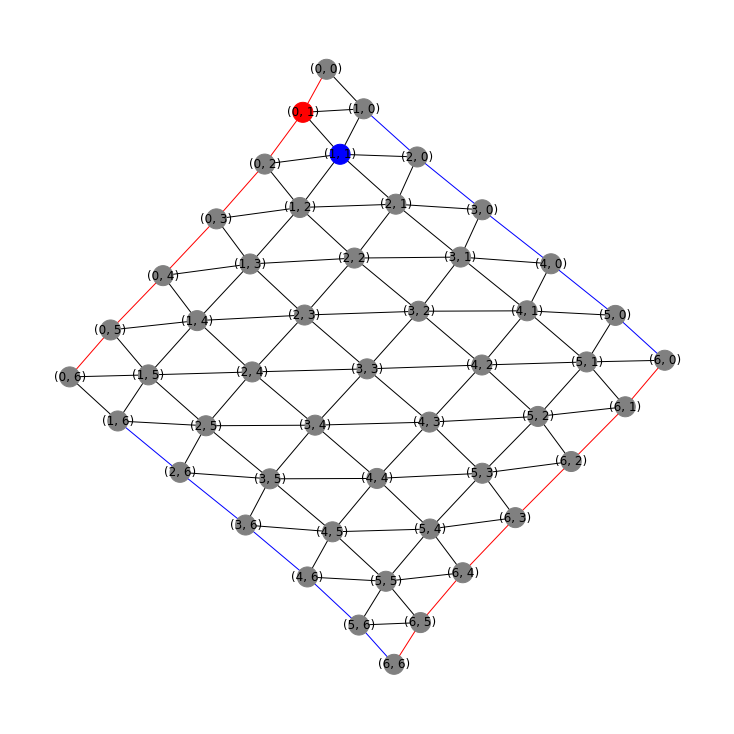

In [34]:
s = HexState.empty_board(starting_player=1)
s=s.do_action(HexAction(1,1))
# s=s.do_action(HexAction(1,2))
s=s.do_action(HexAction(1,0))
# s=s.do_action(HexAction(2,1))
# s=s.do_action(HexAction(0,1))
s = s.inverted()
s.plot(labels=True)

In [36]:
p = hex18.policy(np.array([s.as_vector(2)]))
p.numpy()

array([[3.9533369e-02, 5.5341616e-02, 6.5662220e-02, 6.3267961e-02,
        1.0199174e-06, 5.0898061e-06, 1.6023990e-06, 2.5805278e-04,
        7.2754063e-02, 3.0354071e-02, 2.1559041e-02, 4.2796060e-02,
        6.2238418e-05, 9.2173284e-19, 8.3468884e-02, 5.2255563e-02,
        7.9989601e-03, 5.9095293e-04, 2.7815383e-06, 1.9702487e-05,
        3.5326250e-03, 2.0149937e-03, 7.8952848e-04, 9.2200143e-03,
        4.5396871e-04, 5.3835259e-04, 4.0192326e-06, 7.0845746e-02,
        4.3625674e-05, 2.6599616e-03, 2.0153704e-03, 1.0941193e-03,
        2.8461978e-02, 6.0329698e-05, 3.1315792e-02, 2.9215574e-09,
        5.9700466e-07, 1.6767402e-03, 9.4749688e-05, 1.1273932e-02,
        1.1931903e-02, 4.1006204e-02, 4.2196662e-06, 4.8009639e-08,
        5.5438075e-02, 6.6073671e-02, 8.1468411e-02, 4.0868230e-02,
        1.1795361e-03]], dtype=float32)

In [42]:
a = p.numpy()[0]
a

array([0.08159427, 0.00070907, 0.1927463 , 0.21806227, 0.00094982,
       0.10674471, 0.22306573, 0.1169835 , 0.05914441], dtype=float32)

In [56]:
t = 5
b = a**t / np.sum(a**t)
b - a

array([-0.07891826, -0.00070907,  0.00409587,  0.14676772, -0.00094982,
       -0.09649009,  0.18558493, -0.10077246, -0.05860892], dtype=float32)

In [57]:
b

array([2.6760001e-03, 1.3262563e-13, 1.9684216e-01, 3.6482999e-01,
       5.7198349e-13, 1.0254625e-02, 4.0865067e-01, 1.6211046e-02,
       5.3549628e-04], dtype=float32)

array([-0.02396456, -0.00066238,  0.01648951,  0.03372149, -0.00087744,
       -0.02051111,  0.03743339, -0.01804989, -0.02357902], dtype=float32)

In [37]:
anet4.select_action(s, greedy=True)

HexAction(row=2, col=1)

In [71]:
v = anet99.evaluate_state(s)
v

-0.6362302

In [39]:
s.get_all_actions()

[HexAction(row=0, col=0),
 HexAction(row=0, col=1),
 HexAction(row=0, col=2),
 HexAction(row=1, col=0),
 HexAction(row=1, col=1),
 HexAction(row=1, col=2),
 HexAction(row=2, col=0),
 HexAction(row=2, col=1),
 HexAction(row=2, col=2)]

In [75]:
a = anet99.select_action(s, greedy=True)
a

HexAction(row=2, col=0)